# 1일차 – SVM 분류 심화 강의

---

## 1. SVM 분류 개요

- **개념**  
  - 두 클래스 간 최적의 **마진(maximum margin)** 결정 경계 찾기  
  - 결정 함수: \\(w^T x + b = 0\\)  

- **핵심 하이퍼파라미터**  
  1. **kernel**  
     - `linear`, `poly`, `rbf`, `sigmoid`  
  2. **C (Regularization)**  
     - C↑ → 마진 폭 ↓ (허용 오분류 ↓) → 과적합↑  
     - C↓ → 마진 폭 ↑ (허용 오분류 ↑) → 과소적합↑  
  3. **gamma** (RBF/Poly/Sigmoid)  
     - gamma↑ → 국소적 경계 (복잡도↑)  
     - gamma↓ → 전역적 경계 (단순도↑)

- **SVM 학습 단계**  
  1. 서포트 벡터 식별  
  2. 마진 폭(maximum margin) 최대화  
  3. Slack 변수로 소프트 마진 조정

> **Kernel 선택 가이드**
>
> * **linear**: 선형적으로 분리 가능한 데이터, 특징 수가 많거나 빠른 학습이 필요할 때
> * **rbf**: 대부분 일반적인 비선형 데이터, 경계가 부드러운 곡선일 때
> * **poly**: 다항 관계(곡선·곡면) 모델링이 필요할 때(`degree`로 복잡도 조정)
> * **sigmoid**: 신경망의 활성화 함수(s-shaped) 유사 분포, 드물게 사용

> **C (정규화 파라미터)**
>
> * **작은 C**(예: 0.01, 0.1): 마진을 넓게 허용, 과소적합 방지 위주
> * **기본 C**(예: 1): 균형 잡힌 성능
> * **큰 C**(예: 10, 100): 마진 좁게 설정, 과적합 가능성↑

> **gamma (커널 계수, RBF/Poly/Sigmoid용)**
>
> * **작은 gamma**(예: 0.1): 영향 범위 넓음, 단순한 경계
> * **scale/auto**: 데이터 특성 기반 자동 설정
> * **큰 gamma**(예: 1, 10): 영향 범위 좁음, 복잡한 경계

> **degree (다항 커널 전용)**
>
> * **degree=2\~3**: 2차 or 3차 곡선 관계 모델링
> * **degree↑**: 고차 다항 관계, 과적합 주의


## 2. 보강 주제 및 예제

1. **커널 비교**  
   - `linear` vs `rbf` vs `poly(degree=3)`  
   - **예제**: make_moons 데이터에 적용  

2. **C 값 변화**  
   - C = 0.1, 1, 10  
   - **예제**: poly 커널에서 C 변화에 따른 경계  

3. **gamma 변화**  
   - gamma = 0.1, 1, scale  
   - **예제**: rbf 커널에서 gamma 변화 관찰  

4. **확률 출력 (probability=True)**  
   - SVM은 기본 확률 미지원 → `probability=True`로 로지스틱 회귀 이중화  
   - **예제**: predict_proba 사용

5. **파이프라인 & GridSearch**  
   - 스케일링 + SVM + 하이퍼 튜닝  
   - **예제**: `Pipeline` + `GridSearchCV`

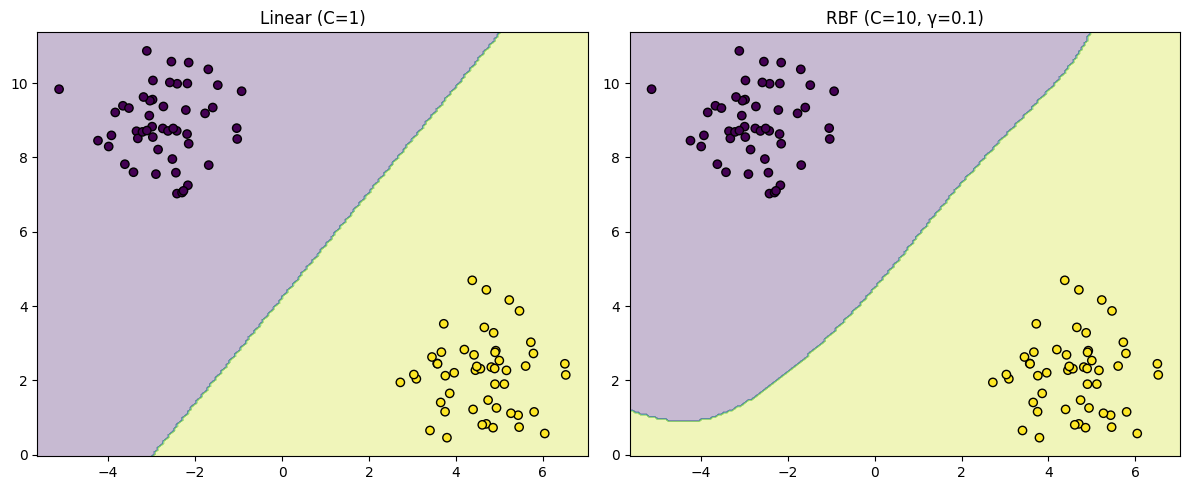

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# 1) 샘플 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# 2) 시각화 함수 (title 인자는 분리해서 사용)
def plot_svm(ax, title=None, **svc_params):
    svc = SVC(**svc_params).fit(X, y)
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
    )
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    if title:
        ax.set_title(title)

# 3) 다양한 SVC 설정
configs = [
    {'C': 1, 'kernel': 'linear', 'title': 'Linear (C=1)'},
    {'C': 10, 'kernel': 'rbf', 'gamma': 0.1, 'title': 'RBF (C=10, γ=0.1)'},
]

# 4) 플롯 생성
fig, axes = plt.subplots(1, len(configs), figsize=(6 * len(configs), 5))
for ax, cfg in zip(axes, configs):
    plot_svm(ax, **cfg)

plt.tight_layout()
plt.show()

## 3. 학생 실습 과제

1. **Kernel 실험**  
   - `linear`, `rbf`, `poly(degree=2,3,4)` 경계 비교  

2. **C 값 탐색**  
   - C=0.01, 0.1, 1, 10, 100에서 정확도 및 경계 분석  

3. **Gamma 조정**  
   - `gamma='scale'` vs `gamma=0.1, 1, 10` 실험  

4. **확률 출력 활용**  
  svc = SVC(kernel='rbf', C=1, gamma='scale', probability=True).fit(X, y)
   print(svc.predict_proba(X_test))

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 분할
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1) Kernel 실험 (linear vs rbf)
for kernel in ['linear','rbf']:
    svc = SVC(kernel=kernel, C=1, gamma='scale').fit(X_train, y_train)
    print(f"{kernel}: Acc =", accuracy_score(y_test, svc.predict(X_test)))

# 2) C 값 탐색
for C in [0.01,0.1,1,10,100]:
    svc = SVC(kernel='rbf', C=C, gamma='scale').fit(X_train, y_train)
    print(f"C={C}: Acc =", accuracy_score(y_test, svc.predict(X_test)))

# 3) Gamma 조정
for gamma in [0.1,1,10,'scale']:
    svc = SVC(kernel='rbf', C=1, gamma=gamma).fit(X_train, y_train)
    print(f"gamma={gamma}: Acc =", accuracy_score(y_test, svc.predict(X_test)))

# 4) 확률 출력 활용
svc_prob = SVC(kernel='rbf', C=1, gamma='scale', probability=True).fit(X_train, y_train)
print("Probabilities example:", svc_prob.predict_proba(X_test[:5]))

# 5) Pipeline + GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
param_grid = {'svc__C':[0.1,1,10], 'svc__gamma':['scale','auto']}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
best = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best Acc:", accuracy_score(y_test, best.predict(X_test)))


linear: Acc = 0.8666666666666667
rbf: Acc = 0.9888888888888889
C=0.01: Acc = 0.4444444444444444
C=0.1: Acc = 0.9222222222222223
C=1: Acc = 0.9888888888888889
C=10: Acc = 0.9777777777777777
C=100: Acc = 0.9777777777777777
gamma=0.1: Acc = 0.8888888888888888
gamma=1: Acc = 0.9888888888888889
gamma=10: Acc = 0.9777777777777777
gamma=scale: Acc = 0.9888888888888889
Probabilities example: [[0.95859461 0.04140539]
 [0.997348   0.002652  ]
 [0.00702839 0.99297161]
 [0.99577921 0.00422079]
 [0.97134739 0.02865261]]
Best params: {'svc__C': 1, 'svc__gamma': 'scale'}
Best Acc: 0.9777777777777777


In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 분할
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_test.shape, y_test.shape)
# ——————————————————————
# 최적값 찾기
# ——————————————————————

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# 2) 탐색할 하이퍼파라미터 그리드
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'svc__kernel':['linear', 'rbf'],# 'poly', 'sigmoid'],
    'svc__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}

# 3) GridSearchCV 생성
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',     # 필요에 따라 변경 가능
    n_jobs=-1
)

# 4) 학습 및 탐색
grid.fit(X_train, y_train)

# 5) 최적 결과 출력
print("\nBest Params:")
print(" 스케일러:", grid.best_params_['scaler'])
print(" 커널:", grid.best_params_['svc__kernel'])
print(" C:", grid.best_params_['svc__C'])
print(" gamma:", grid.best_params_['svc__gamma'])
print("교차검증 최고 점수:", grid.best_score_)
#print("테스트 세트 정확도:", grid.best_estimator_(X_test, y_test))
best_pipe = grid.best_estimator_
y_pred = best_pipe.predict(X_test)
test_acc_2 = accuracy_score(y_test, y_pred)
print(test_acc_2)

(90, 2) (90,)

Best Params:
 스케일러: StandardScaler()
 커널: rbf
 C: 1
 gamma: 1
교차검증 최고 점수: 0.980952380952381
0.9777777777777777
